# How to Use Pre-Trained Models
The use of a pre-trained model is limited only by your creativity.

For example, a model may be downloaded and used as-is, such as embedded into an application and used to classify new photographs.

Alternately, models may be downloaded and use as feature extraction models. Here, the output of the model from a layer prior to the output layer of the model is used as input to a new classifier model.

Recall that convolutional layers closer to the input layer of the model learn low-level features such as lines, that layers in the middle of the layer learn complex abstract features that combine the lower level features extracted from the input, and layers closer to the output interpret the extracted features in the context of a classification task.

Armed with this understanding, a level of detail for feature extraction from an existing pre-trained model can be chosen. For example, if a new task is quite different from classifying objects in photographs (e.g. different to ImageNet), then perhaps the output of the pre-trained model after the few layers would be appropriate. If a new task is quite similar to the task of classifying objects in photographs, then perhaps the output from layers much deeper in the model can be used, or even the output of the fully connected layer prior to the output layer can be used.

The pre-trained model can be used as a separate feature extraction program, in which case input can be pre-processed by the model or portion of the model to a given an output (e.g. vector of numbers) for each input image, that can then use as input when training a new model.

Alternately, the pre-trained model or desired portion of the model can be integrated directly into a new neural network model. In this usage, the weights of the pre-trained can be frozen so that they are not updated as the new model is trained. Alternately, the weights may be updated during the training of the new model, perhaps with a lower learning rate, allowing the pre-trained model to act like a weight initialization scheme when training the new model.

We can summarize some of these usage patterns as follows:

- **Prediction**: The pre-trained model is used directly to classify new images.
- **Feature Extractor**: The pre-trained model, or some portion of the model, is used to pre-process images and extract relevant features. Layers of the pre-trained model are frozen during training.
- **Fine-tuning /Weight Initialization**: The pre-trained model, or some portion of the model, is integrated into a new model, and the layers of the pre-trained model are trained in concert with the new model.

Each approach can be effective and save significant time in developing and training a deep convolutional neural network model.

It may not be clear as to which usage of the pre-trained model may yield the best results on your new computer vision task, therefore some experimentation may be required.

# Models for Transfer Learning
There are perhaps a dozen or more top-performing models for image recognition that can be downloaded and used as the basis for image recognition and related computer vision tasks.

Perhaps three of the more popular models are as follows:

- VGG (e.g. VGG16 or VGG19).
- GoogLeNet (e.g. InceptionV3).
- Residual Network (e.g. ResNet50).

These models are both widely used for transfer learning both because of their performance, but also because they were examples that introduced specific architectural innovations, namely consistent and repeating structures (VGG), inception modules (GoogLeNet), and residual modules (ResNet).

Keras provides access to a number of top-performing pre-trained models that were developed for image recognition tasks.

They are available via the [Applications API](https://keras.io/api/applications/), and include functions to load a model with or without the pre-trained weights, and prepare data in a way that a given model may expect (e.g. scaling of size and pixel values).

The first time a pre-trained model is loaded, Keras will download the required model weights, which may take some time given the speed of your internet connection. Weights are stored in the .keras/models/ directory under your home directory and will be loaded from this location the next time that they are used.

When loading a given model, the “include_top” argument can be set to False, in which case the fully-connected output layers of the model used to make predictions is not loaded, allowing a new output layer to be added and trained. For example:


In [5]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [6]:
PATH_TO_IMG = '/gdrive/MyDrive/GoogleColab/ML-biomedical-data/Chest-x-rays-C/dog.jpg'


In [17]:
# example of using a pre-trained model as a classifier
from tensorflow import keras
from keras.preprocessing.image import  load_img, img_to_array 
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

# load an image from file
image = load_img(PATH_TO_IMG, target_size=(224, 224))



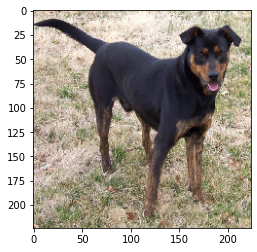

In [18]:
plt.imshow(image)

In [9]:
# convert the image pixels to a numpy array
image = img_to_array(image)
image.shape

(224, 224, 3)

In [10]:
image.max()
image.min()

0.0

In [11]:

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


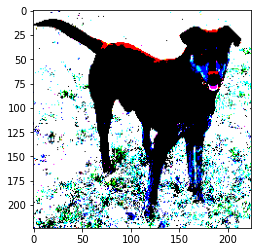

In [12]:
plt.imshow(image[0])

In [13]:
image.shape

(1, 224, 224, 3)

[VGG16](https://keras.io/api/applications/vgg/#vgg16-function)

https://stackoverflow.com/questions/61060736/how-to-interpret-model-summary-output-in-cnn

In [14]:

# load the model
model = VGG16()
model.summary()

553467904/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:

# predict the probability across all output classes
yhat = model.predict(image)
yhat
# yhat.max()


0.35419112

In [ ]:
# convert the probabilities to class labels
label = decode_predictions(yhat)
label

40960/35363 [==================================] - 0s 0us/step


[[('n02107142', 'Doberman', 0.35419112),
  ('n02105412', 'kelpie', 0.19439043),
  ('n02106550', 'Rottweiler', 0.16862379),
  ('n02089078', 'black-and-tan_coonhound', 0.13516624),
  ('n02107312', 'miniature_pinscher', 0.038150124)]]

In [ ]:


# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))


Doberman (35.42%)


In [ ]:
# # load model without classifier layers
# model = VGG16(include_top=False, input_shape=(300, 300, 3))
# # mark some layers as not trainable
# model.get_layer('block1_conv1').trainable = False
# model.get_layer('block1_conv2').trainable = False
# model.get_layer('block2_conv1').trainable = False
# model.get_layer('block2_conv2').trainable = False
# ...

# Pre-Trained Model as Feature Extractor in Model
We can use some or all of the layers in a pre-trained model as a feature extraction component of a new model directly.

This can be achieved by loading the model, then simply adding new layers. This may involve adding new convolutional and pooling layers to expand upon the feature extraction capabilities of the model or adding new fully connected classifier type layers to learn how to interpret the extracted features on a new dataset, or some combination.

For example, we can load the VGG16 models without the classifier part of the model by specifying the “include_top” argument to “False”, and specify the preferred shape of the images in our new dataset as 300×300.

In [ ]:
# example of tending the vgg16 model
# include_top: whether to include the 3 fully-connected layers at the top of the network.
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
model2 = VGG16(include_top=False, input_shape=(300, 300, 3))
model2.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [ ]:
aux_layer = model2.layers[0]
print(aux_layer.trainable)
aux_layer.get_config()

True


{'batch_input_shape': (None, 300, 300, 3),
 'dtype': 'float32',
 'name': 'input_4',
 'ragged': False,
 'sparse': False}

In [ ]:
aux_layer = model.layers[0]
print(aux_layer.trainable)
aux_layer.get_config()

True


{'batch_input_shape': (None, 224, 224, 3),
 'dtype': 'float32',
 'name': 'input_2',
 'ragged': False,
 'sparse': False}

In [ ]:
model2.layers[-1].get_config()

{'data_format': 'channels_last',
 'dtype': 'float32',
 'name': 'block5_pool',
 'padding': 'valid',
 'pool_size': (2, 2),
 'strides': (2, 2),
 'trainable': True}

In [ ]:
model2.layers[-1].output

<KerasTensor: shape=(None, 9, 9, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:

# add new classifier layers
flat1 = Flatten()(model2.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model3 = Model(inputs=model2.inputs, outputs=output)
# summarize
model3.summary()
# ...

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0   

# OTHER EXAMPLES

From https://keras.io/api/applications/

## Classify ImageNet classes with ResNet50


102973440/102967424 [==============================] - 2s 0us/step


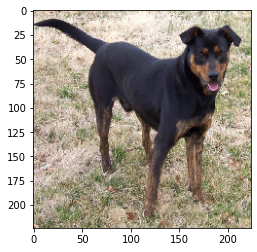

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

img_path = PATH_TO_IMG
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


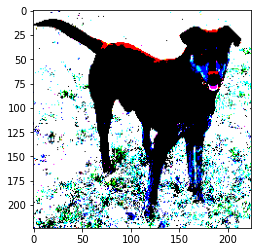

In [ ]:

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
# x.reshape((1, x.shape[0], x.shape[1], x.shape[2])).shape
x = preprocess_input(x)
plt.imshow(x[0])

In [ ]:
model = ResNet50(weights='imagenet')
model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02105412', 'kelpie', 0.5118198), ('n02107142', 'Doberman', 0.15323815), ('n02089078', 'black-and-tan_coonhound', 0.12139755)]


## Extract features with VGG16


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img = image.load_img(PATH_TO_IMG, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [ ]:
features.shape

(1, 7, 7, 512)

## Fine-tune InceptionV3 on a new set of classes


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

for layer in model.layers:
  print(layer, layer.trainable)

87916544/87910968 [==============================] - 1s 0us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fd452e31450> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd452d37590> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd452ecb450> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fd452ecb210> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd452d36d10> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd452ed1690> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fd452d37390> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd452eb0f90> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd452cdfbd0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fd452e97990> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D 

In [ ]:

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
# model.fit(...)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)


0 input_11
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14


In [ ]:

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(...)

## Extract features from an arbitrary intermediate layer with VGG19


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
base_model.summary()

574717952/574710816 [==============================] - 5s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:

model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
for l in model.layers:
  l.trainable = False
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
# model.layers[4].trainable

In [ ]:
x = keras.layers.Flatten()(model.output)
x = keras.layers.Dense(32, activation='relu')(x)
x = keras.layers.Dense(8, activation='softmax')(x)

In [ ]:
model_new = Model(inputs=model.input, outputs=x)
model_new.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
for l in model_new.layers:
  print(l, l.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fd45307ecd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd45307b4d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd45307b690> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fd45bf52b50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd453bc16d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd4530a7fd0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fd4530ec110> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd453082ed0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd453082f10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd4530ec210> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd453021d50> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

In [ ]:

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

## Build InceptionV3 over a custom input tensor


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input

# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(224, 224, 3))

model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)